## <span style='color:red'>BOOMBIKES BIKE-SHARING ASSIGNMENT | MULTIPLE LINEAR REGRESSION</span>
### <span style='color:blue'>Assignment Background: </span>
- BoomBikes, a US bike-sharing provider, has recently faced significant revenue declines due to the ongoing COVID-19 pandemic. The challenging market conditions have made it difficult for the company to maintain operations. To swiftly boost their revenue, once the lockdown ends and the economy recovers, BoomBikes is developing a strategic business plan.
### <span style='color:blue'>Problem Statement:</span>
- Develop a multiple linear regression model to predict the demand for shared bikes using the provided independent variables. This model will help BoomBikes understand the key factors influencing bike demand and optimize their business strategy post-pandemic and recover from the revenue declines caused by the pandemic.
### <span style='color:blue'>Essentially the company wants :</span>

To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-1, b     y creating a linear mode
   - .
To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bik
   - To know the accuracy of the model, i.e. How well those variables describe the bike demands.
ands

[<span style='color:red'>CLICK HERE : For Data Dictionary](https://github.com/Shivani210997/Linear_Regression-Bike-Sharing-Assignment/blob/main/Readme.txt)</span>

## Step 1: Reading and Understanding the Bike-sharing Dataset named as 'day'.

In [5887]:
#Let us first import NumPy and Pandas and read the bike-sharing dataset.
import numpy as np
import pandas as pd

#Import Libraries for Visvualization.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import r2_score

In [5889]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5891]:
bike = pd.read_csv('C:/Users/SHIVANI KASHYAP/Documents/ML-C65 ML and AI Batch May/ML - Linear Regression/Bike Sharing Assignment _ Multiple Linear Regression/day.csv')

In [5893]:
#To view the first 5 entries of the dataset.
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.1 Inspecting the Data.

In [5896]:
bike.shape

(730, 16)

In [5897]:
#Check for any Missing Values.
bike.info()
#As we can see the below output, there are no missing values in the dataset, hence we can proceed further.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5898]:
#Statistical summary of the dataset.
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### <span style='color:red'>INFERENCE:</span> 
- In the Bike-Sharing Prediction dataset, there are a total of 730 rows and 16 columns as shown in the output of the 'bike.shape'.

In [5903]:
#To view the Datatypes of each row.
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Note : Model Building
- The model should be built taking this 'cnt' as the target variable for the prediction purposes.

### 1.2 Data Quality Check.

In [5907]:
#Checking for Missing Values within the dataframe for each column,
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5909]:
#Checking for Missing Values within the dataframe for each row,
missing_values_per_row = bike.isnull().sum(axis=1)
print(missing_values_per_row)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64


#### <span style='color:red'>INFERENCE:</span>
- 'No' Missing/Null values found for the columns and rows in a dataframe.

### 1.3 Checking for Duplicate values.

In [5913]:
#Checking for duplicate values
bike_duplicate_values = bike.copy()

#Checking for duplicates and dropping the entire duplicate row if any
bike_duplicate_values.drop_duplicates(subset=None, inplace=True)
bike_duplicate_values.shape

(730, 16)

In [5915]:
#Original Dataset shape
bike.shape

(730, 16)

#### <span style='color:red'>INFERENCE:</span>
- Duplicate values do not exist.

## Step 2: Pre-processing Steps.

### 2.1 Data Cleaning.
#### Visualizing the continuous Varbales.
#### Dropping few variables as they are not required.
- Based on an initial review of the data and the data dictionary, the following variables can be excluded from further analysis:
  - instant: This is an index column, and we already have a default index serving the same purpose.
  - dteday: This column contains date information, but we have separate columns for year and month with same details, we can perform our analysis without dteday.
  - casual & registered: These columns represent bike bookings by different customer categories. Since our focus is on the total bike count rather than specific categories, we will exclude these columns.
- Let's drop the highlighted columns as we don't need them for further analysis.


In [5920]:
#Lets exclude the columns from further analysis, as described above.
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5922]:
# Dropping the columns 'instant','dteday','casual' and 'registered'
bike.drop(columns=['instant', 'dteday','casual', 'registered'], inplace=True)

In [5924]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [5926]:
#As we have dropped 4 columns which are not required, hence the 'shape' count for columns has reduced.
bike.shape

(730, 12)

In [5928]:
#Check for any Missing Values.
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### 2.2 Handling Outliers if any.

In [5931]:
#Display unique values present in the dataset.
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

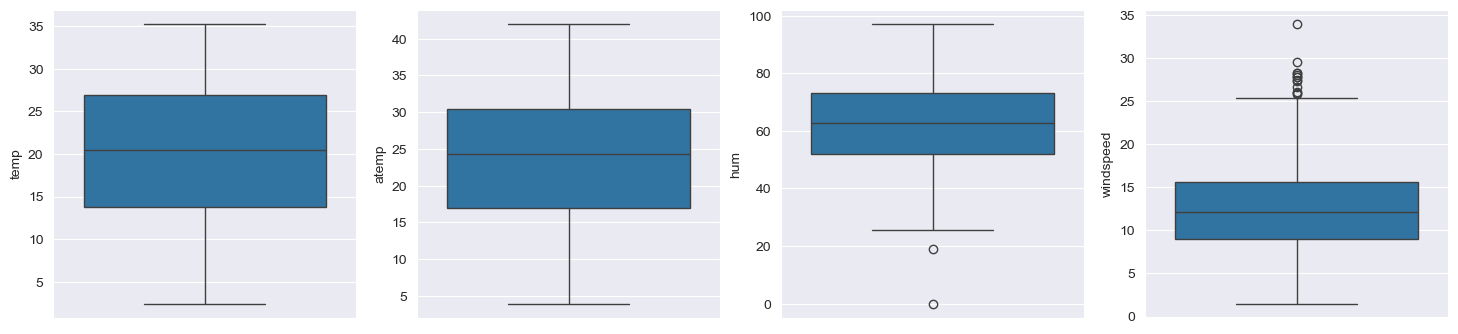

In [5933]:
#Checking for any outliers for numerical variable,
columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

#### <span style='color:red'>INFERENCE:</span>
1. 'temp' and 'atemp' distributions are very similar, suggesting temperature closely follows actual temperature without any significant outliers.
2. 'hum' shows some low outliers, indicating very low humidity occassionally.
3. 'windspeed' has several high outliers, indicating some instances, where windspeed is unusually high compared to the rest of the data.

In [5936]:
#statistical summary of the dataset.
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### 2.2 Encoding/Mapping: 
- To convert categorical data which were primarily numeric to more meaningful ones such as categorical string values, before proceeding with model building.
- (REFERENCE: Data Dictionary)

In [5939]:
#changing categorical data which were primarily numeric to more meaningful one
# Encoding/mapping all the categorical columns,
bike.season = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike.mnth = bike.mnth.map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                            7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})
bike.weekday = bike.weekday.map({0: 'Tues',1: 'Wed',2: 'Thurs',3: 'Fri',4: 'Sat',5: 'Sun',6: 'Mon'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist',3:'LightSnowRain',4:'HeavySnowRain'})
bike.yr= bike.yr.map({0: '2018', 1: '2019'})
bike.workingday = bike.workingday.map({0: 'Weekend', 1: 'Weekday'}) 

#Verify the head of the 'bike' dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Mon,Weekend,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Tues,Weekend,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Wed,Weekday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Thurs,Weekday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Fri,Weekday,Clear,9.305237,11.46350,43.6957,12.522300,1600


### 2.3 Visualising the Dataset.
- We shall now understand the data 'arguably' - as it is the most crucial step.
   - If multicollinearity occurs, this is the first place to catch it.
   - Identify if some predictor variables, directly correlate strongly with the outcome variable.
- We'll visualise our data using Matplotlib and Seaborn.

### <span style='color: orange'>A. Visualising the Numerical Variable using 'pairplot' to check for Linear relationship.</span>

### <span style='color: orange'>Multivariate Analysis | 'pairplot'</span>

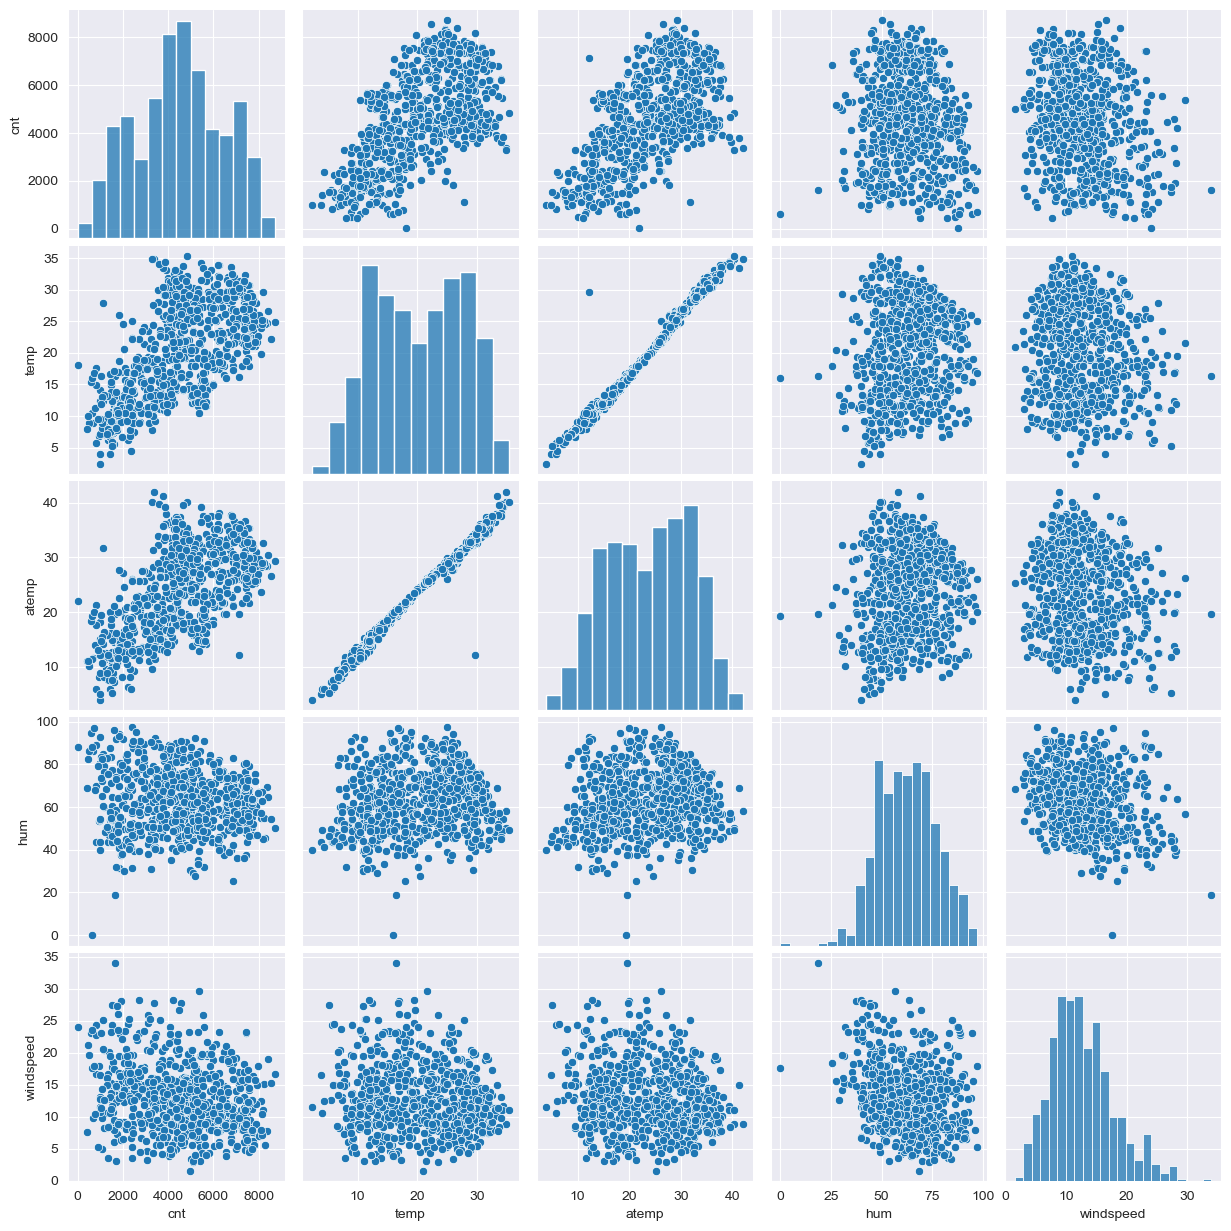

In [5944]:
#Visualising the numerical variables
sns.pairplot(data=bike, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### <span style='color:red'>INFERENCES:</span>
- Upon visualising the numeric variables,
   1. There is a clear positive linear relationship between both 'temp' and 'atemp' with 'cnt'. As the temperature increases, the count (cnt) of bike rentals also tends to increase. This suggests that warmer temperatures encourage more bike rentals.
   2. We should consider a linear model for this case, as there are independent variables such as 'atemp' and 'temp' that exhibit a positive correlation with the target variable 'cnt'.
   3. Variables such as 'hum' and 'windspeed' do not exhibit a strong linear relationship with the target variable 'cnt'.
      These variables may not be as useful in predicting bike rentals using a linear model, however, we shall proceed ahead and interpret .

### <span style='color: orange'>B. Visualising the categorical variables using 'boxplot'.</span>

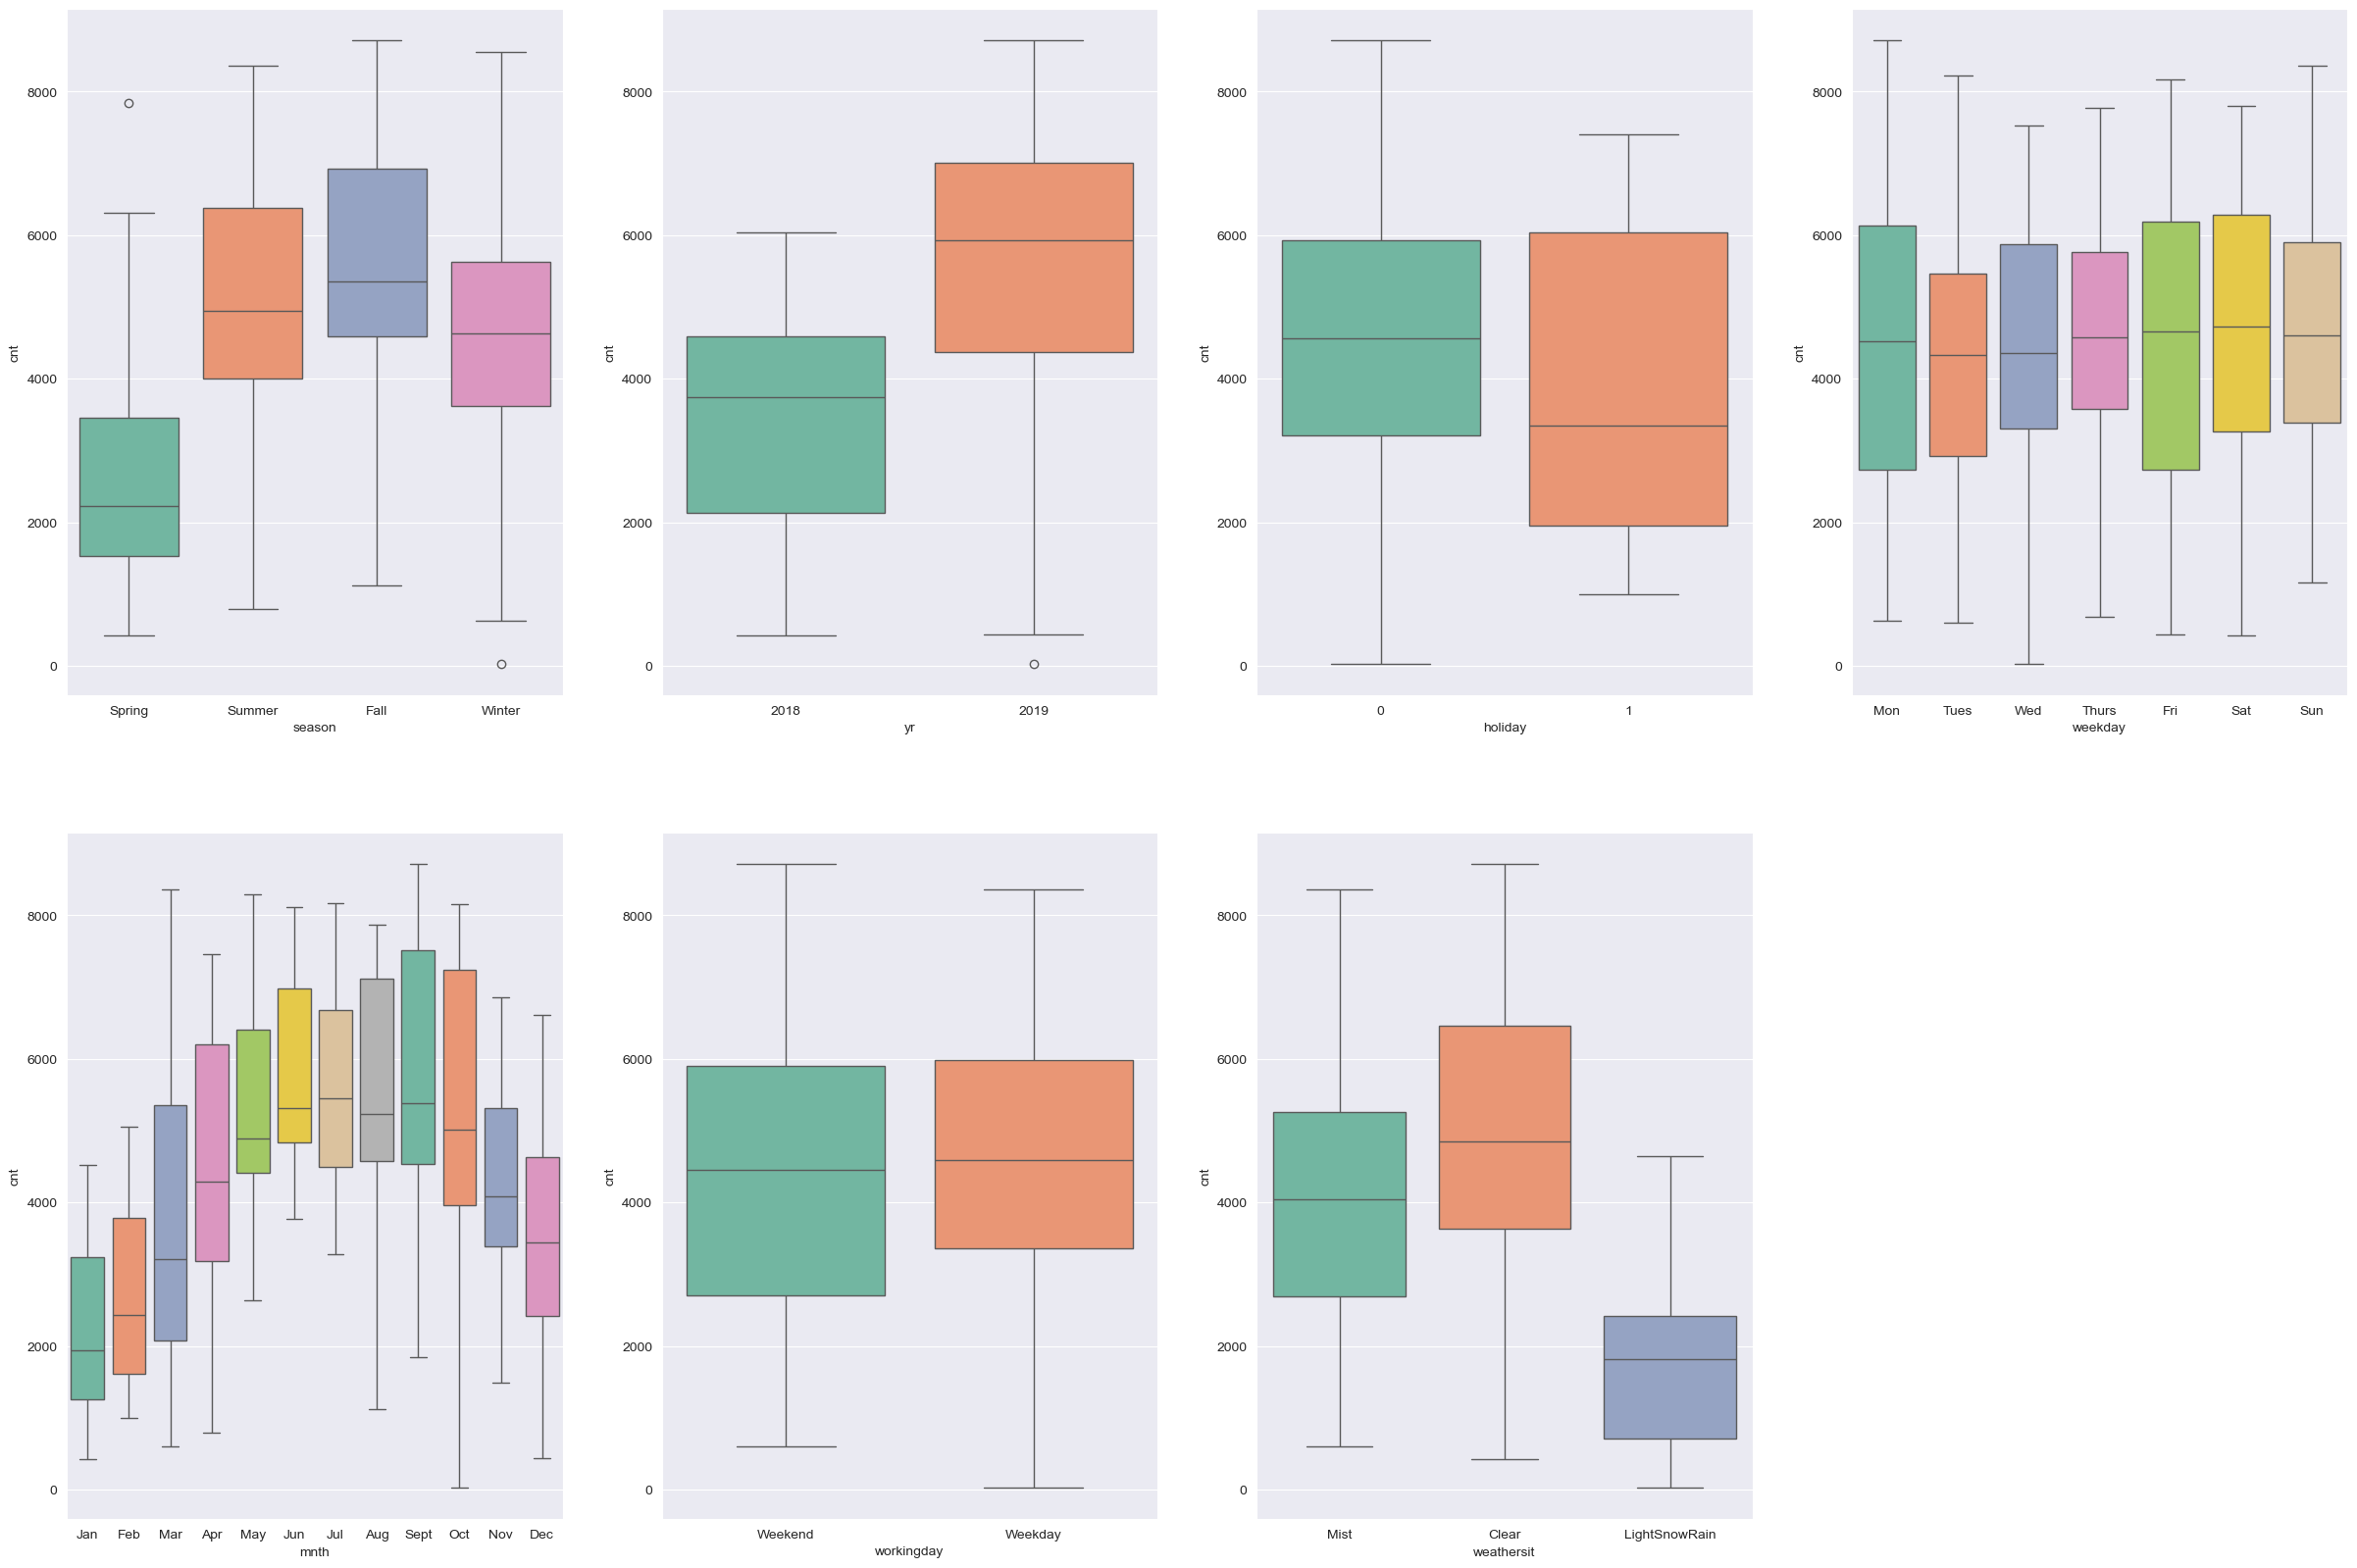

In [5948]:
# Custom color palette.
palette = sns.color_palette("Set2")

#Figure size of the plots shown. 
plt.figure(figsize=(30, 20))

#To plot multiple boxplots.
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike, palette=palette)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike, palette=palette)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike, palette=palette)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike, palette=palette)
plt.subplot(2,4,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike, palette=palette)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike, palette=palette)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike, palette=palette)
plt.show()

In [5950]:
#To confirm as there was no observation plotted for 'HeavysnowRain' for 'weathersit' col.
print(bike['weathersit'].value_counts())

weathersit
Clear            463
Mist             246
LightSnowRain     21
Name: count, dtype: int64


#### <span style='color:red'>INFERENCES: 
1. Bike rentals are highest in summer and fall, and lowest in spring and winter. Seasonality has a significant impact on the number of bike rentals.
2. There is a noticeable increase in bike rentals in the year 2019, as '1' indicates 2019 from the Data Dictionary, possibly due to the increased popularity of the bike-sharing service.
3. Bike rentals are slightly more common on non-holidays, indicating that people may use bikes more for commuting or daily activities rather than on holidays.
4. Bike rentals appear consistent throughout the week, suggesting that the day of the week is not a strong factor in the rental count.
5. Rentals are lower in the winter months (December, January, February) and confirm the seasonal effect, with peak rentals from (March), followed by the summer months (June to September), and start decreasing from October.
6. We can see maximum bookings happening between 4000 and 6000, the median count of users is almost constant  throughout the week.
   There is no strong difference between working days v/s weekends/holiday, indicating consistent usage for both commuting and leisure.
7. Weather plays a crucial role in bike rentals, with more favourable weather leading to higher rental counts.
8. There were no observations recorded under "HeavySnowRain".

## Step 3: Preparing the Data for Modelling.
1. EDA (As required for this data modelling)
2. Encoding/Mapping 
 - Converting binary vars to 1/0 if any.( We already  did this before)
 - Creating dummy variables.
3. Splitting in to train and test.
4. Rescaling of variables.

### 3.1 EDA (Important step in Data Modelling)

### <span style='color: orange'>A. UNIVARIATE ANALYSIS AND BIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS.</span>

#### 1. Representation of a barplot for <span style='color: red'>'season' v/s 'cnt' </span>And <span style='color: red'>'season' v/s 'cnt' over the 'yr'.</span>

In [5957]:
#Let us create a function to plot a barplot, for the categorical columns,
def plot_cat_cols(column):
    plt.figure(figsize=(12, 6))
    
    #First subplot: Bar plot for 'season' vs 'cnt'.
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike, palette='Set2')
    plt.xlabel(column)
    plt.ylabel('Cnt')
    plt.title(f'{column} vs cnt')

    #Second subplot: Bar plot with hue.
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike, hue='yr', palette='Set2')
    plt.xlabel(column)
    plt.ylabel('Cnt')
    plt.title(f'{column} vs Count by Year')

    #Show the plot.
    plt.show()


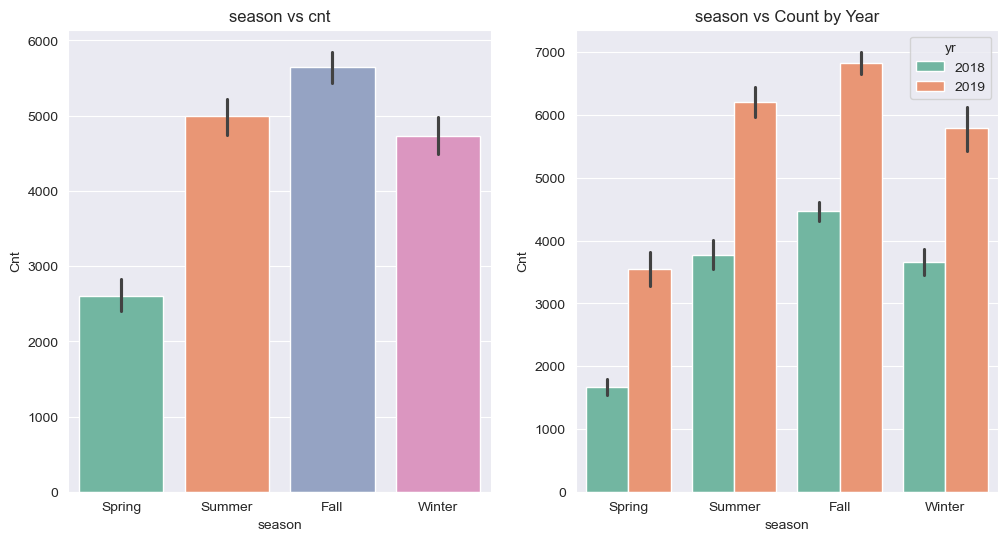

In [5959]:
#Visualization for 'season'.
plot_cat_cols('season')

#### <span style='color:red'>INFERENCES:</span>
1. The counts vary significantly by season, with Fall consistently having the highest values, followed by Winter, Summer, and then Spring.
2. The count (Cnt) increases from 2018 to 2019 across all seasons.

#### 2. Representation of a barplot for <span style='color: red'>'weathersit' v/s 'cnt' </span>And <span style='color: red'>'weathersit' v/s 'cnt' over the 'yr'.</span>

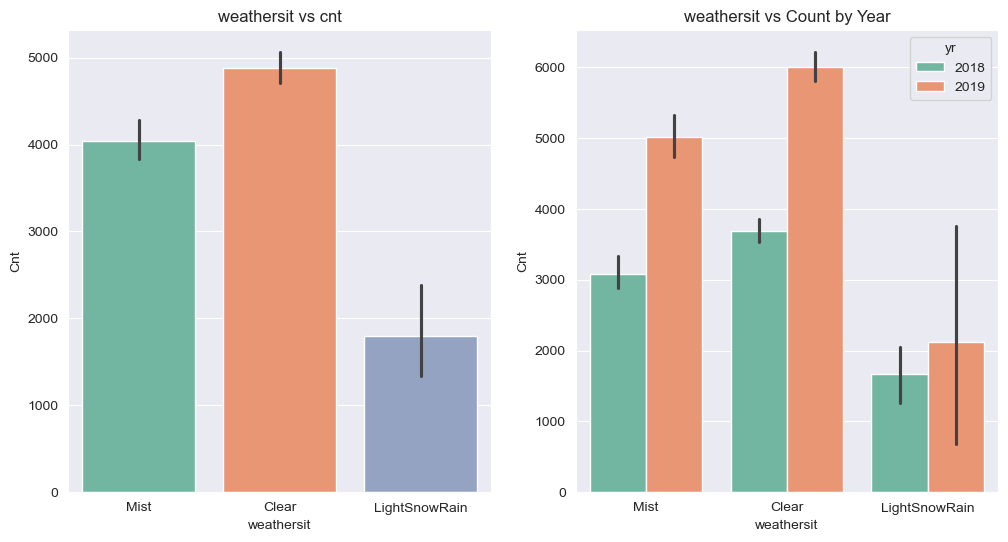

In [5963]:
#Visualization for 'weathersit'.
plot_cat_cols('weathersit')

#### <span style='color:red'>INFERENCES:</span>
1. Clear weather led to more booking counts, which is expected.
2. Additionally, compared to the previous year (2018), bookings increased in 2019 for every type of weather condition.

#### 3. Representation of a barplot for <span style='color: red'>'mnth' v/s 'cnt' </span>And <span style='color: red'>'mnth' v/s 'cnt' over the 'yr'.</span>

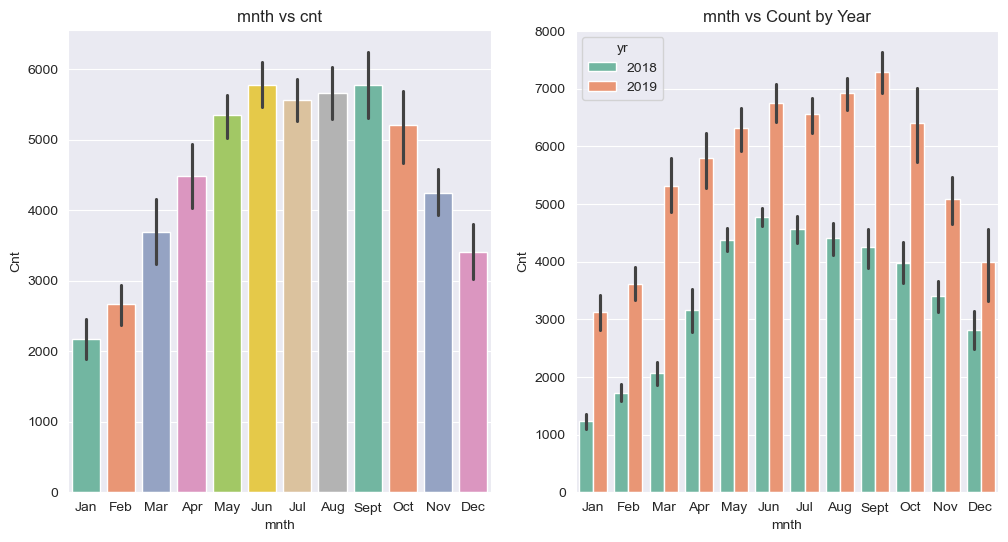

In [5967]:
#Visualization for 'month'.
plot_cat_cols('mnth')

#### <span style='color:red'>INFERENCES:</span>
1. There is a clear seasonal pattern, with counts peaking in the summer months and dropping in the winter months.
2. The counts in 2019 are higher than in 2018 across all months, indicating growth or an increase in the bike rental counts.

#### 4. Representation of a barplot for <span style='color: red'>'workingday'.  </span>

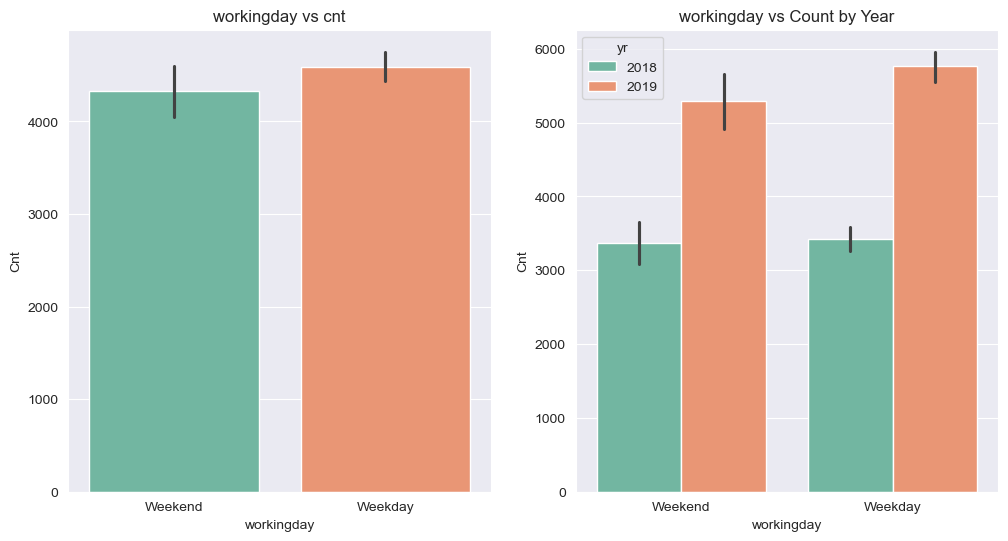

In [5973]:
#Visualization for 'workingday'.
plot_cat_cols('workingday')

#### <span style='color:red'>INFERENCES:</span>
1. There is a noticeable increase in bike counts on weekdays compared to weekends.
2. 2019 shows higher bike counts than 2018 for both weekends and weekdays, indicating an overall increase in bike usage from one year to the next.

#### 5. Representation of a barplot for <span style='color: red'>'holiday'.</span>

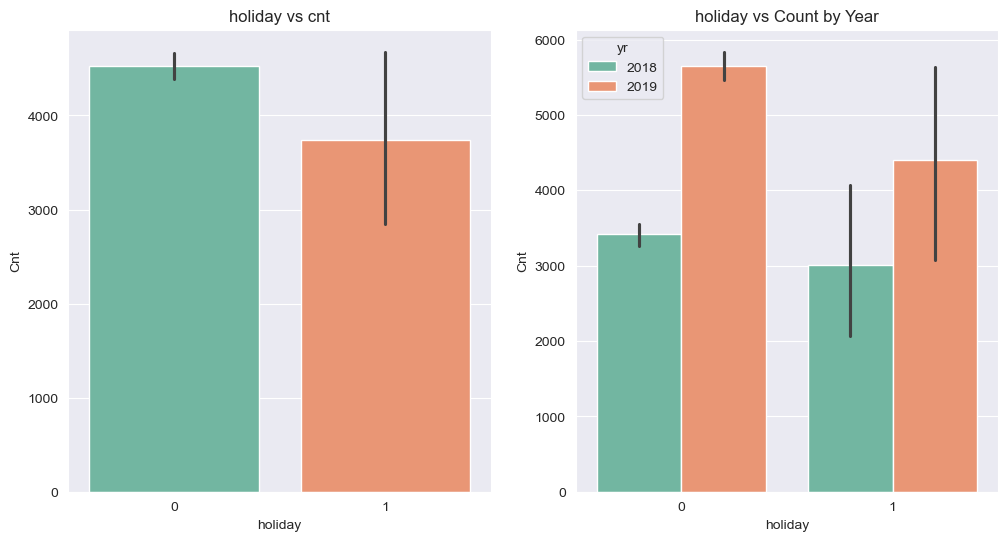

In [5977]:
# Visualization for 'holiday' column.
plot_cat_cols('holiday')

#### <span style='color:red'>INFERENCES:</span>
1. '1' represents: No Holiday (As per the Data dictionary), hence when it's not a holiday, bookings appear to be fewer, which could be due to people preferring to stay at home and enjoy quality time with their families on holidays.

### <span style='color: orange'>B. CORRELATION BETWEEN NUMERICAL VARIABLES.</span>
### <span style='color: orange'>Multivariate Analysis | 'Correlation Matrix with a Heatmap'</span>

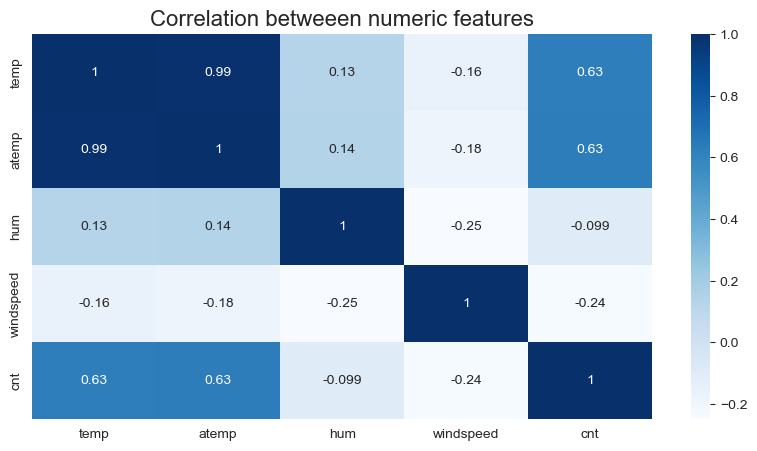

In [5981]:
num_var = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(10,5))
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bike[num_var].corr(),annot= True,cmap="Blues")
plt.show()

#### <span style='color:red'>INFERENCES:</span>
1. Temperature ('temp' and 'atemp') appears to have the most significant impact on the count, indicating a positive correlation, while humidity and wind speed have less influence.

### 3.2 Create Dummy Variables. (Ref: Data Dictionary)
- As observed, we have variables such as 'mnth', 'weekday', 'season', 'weathersit', and 'yr' has various levels, for eg,
  1. 'mnth': Similarly variable 'mnth' has 12 levels.
  2. 'weekday': Day of the week has 7 levels.
  3. 'season': Has 4 levels 'Spring', 'Summer', Fall, Winter.
  4. 'weathersit': This variable has 3 levels 'Clear', 'Mist', 'LightSnowRain', and 'HeavySnowRain'.- We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [5985]:
#Dummy variable creation for month, weekday, weathersit and season variables.
#Dropping a redundant dummy variable, (k-1) , where k= Total number of dummies.
dummy_status = bike[['season','mnth','weekday', 'weathersit']]
dummy_status = pd.get_dummies(dummy_status,drop_first=True).astype(int)

In [5987]:
#View all the dummy variables that have been extracted from the selected columns.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Mon,Weekend,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Tues,Weekend,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Wed,Weekday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Thurs,Weekday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Fri,Weekday,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [5989]:
# Concat the 'dummy_status' data frame with the original data frame 'bike'.
bike = pd.concat([dummy_status,bike],axis = 1)

In [5991]:
#Let us drop the original variables season,weathersit,weekday,mnth, as we have created the dummy variables for each.
#Since i wanted perform EDA on the variables, I didnt drop them earlier during the dummy variables creation.
bike.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)
bike.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_LightSnowRain,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,2018,0,Weekend,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,2018,0,Weekend,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,2018,0,Weekday,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,2018,0,Weekday,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,2018,0,Weekday,9.305237,11.46350,43.6957,12.522300,1600


In [5993]:
print(bike.columns)

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wed', 'weathersit_LightSnowRain', 'weathersit_Mist', 'yr',
       'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [5994]:
bike.shape

(730, 30)

In [5997]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   season_Spring             730 non-null    int32  
 1   season_Summer             730 non-null    int32  
 2   season_Winter             730 non-null    int32  
 3   mnth_Aug                  730 non-null    int32  
 4   mnth_Dec                  730 non-null    int32  
 5   mnth_Feb                  730 non-null    int32  
 6   mnth_Jan                  730 non-null    int32  
 7   mnth_Jul                  730 non-null    int32  
 8   mnth_Jun                  730 non-null    int32  
 9   mnth_Mar                  730 non-null    int32  
 10  mnth_May                  730 non-null    int32  
 11  mnth_Nov                  730 non-null    int32  
 12  mnth_Oct                  730 non-null    int32  
 13  mnth_Sept                 730 non-null    int32  
 14  weekday_Mo

In [5998]:
# Convert the string values back to their original numerical form
bike['yr'] = bike['yr'].map({'2018': 0, '2019': 1})
bike['workingday'] = bike['workingday'].map({'Weekend': 0, 'Weekday': 1})
print(bike)

     season_Spring  season_Summer  season_Winter  mnth_Aug  mnth_Dec  \
0                1              0              0         0         0   
1                1              0              0         0         0   
2                1              0              0         0         0   
3                1              0              0         0         0   
4                1              0              0         0         0   
..             ...            ...            ...       ...       ...   
725              1              0              0         0         1   
726              1              0              0         0         1   
727              1              0              0         0         1   
728              1              0              0         0         1   
729              1              0              0         0         1   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  \
0           0         1         0         0         0  ...   
1          

## Step 4: Train-Test split (70:30 ratio, have been choosen for the split.)
- The first basic step for Regression is performing a train-test split.

In [6002]:
bike.shape

(730, 30)

In [6004]:
#Import Library to perform train_test_split.
from sklearn.model_selection import train_test_split

#train-test split.
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

#Checking shape and size for train and test
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


## Step 5: Rescaling the Features.

- Although, scaling doesn't impact the linear model, in the case of simple linear regression.
However, while performing multiple linear regression, it might impact the model.
As per the observation,the value of the feature 'cnt' has much higher values in comparison to the other features like 'temp', 'atemp' etc.
Hence, it is extremely important to rescale the variables to have a comparable scale. 
- If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
- This might become very annoying at the time of model evaluation.
-  So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
   There are two common ways of rescaling:
    1. Min-Max scaling
    2. Standardisation (mean-0, sigma-1)    
- We will use MinMax scaling at this time.
   - Min-Max scaling (Normalization): Between mean : 0 and std : 1 : 1

### 5.1 Rescaling the Features using Normalization.

In [6008]:
# Below are supported methods/functions, and their calculations.
#fit():  xmin and xmax (fit the scalar on the train dataset)
#transform(): x-min/x-max-x-min (only transform 'test_data', pretending we dont have the test dataset handly like train.)
#fit_transform() : 'train_data'

In [6010]:
#Scale 'Numerical' variables only.
#Use Normalized scaler to scale.

#Import Libraries for Mix-MaxScaler
from sklearn.preprocessing import MinMaxScaler

# 1. Instantiate an object
scaler = MinMaxScaler()

# 2. Fit an object
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables,
num_vars = ['cnt','hum','windspeed','temp','atemp']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_LightSnowRain,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [6012]:
df_train[num_vars].describe()

,cnt,hum,windspeed,temp,atemp
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513620,0.650369,0.320768,0.537262,0.512989
std,0.224593,0.145882,0.169797,0.225844,0.212385
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.538643,0.199179,0.339853,0.332086
50%,0.518638,0.653714,0.296763,0.540519,0.526811
75%,0.684710,0.754830,0.414447,0.735215,0.688457
max,1.000000,1.000000,1.000000,1.000000,1.000000


### 5.2 Dividing into X and Y sets for the model building.

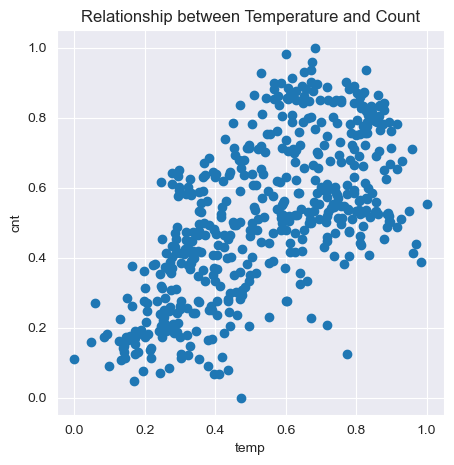

In [6015]:
#Visualizing Scatter plot,
plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
#Add x-axis label           
plt.xlabel('temp') 
#Add y-axis label             
plt.ylabel('cnt')  
#Add title           
plt.title('Relationship between Temperature and Count') 
plt.show()

#### <span style='color:red'>INFERENCES:</span>
1. The given scatterplot visualization confirms the positive correlation between 'temp'(individual) and 'cnt'(target) variables respectively.

In [6018]:
#y to contain only the target variable,
y_train = df_train.pop('cnt')
X_train = df_train 

In [6020]:
#After popping the y variable.
df_train.shape

(510, 29)

In [6022]:
df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wed,weathersit_LightSnowRain,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.150980,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.358381,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


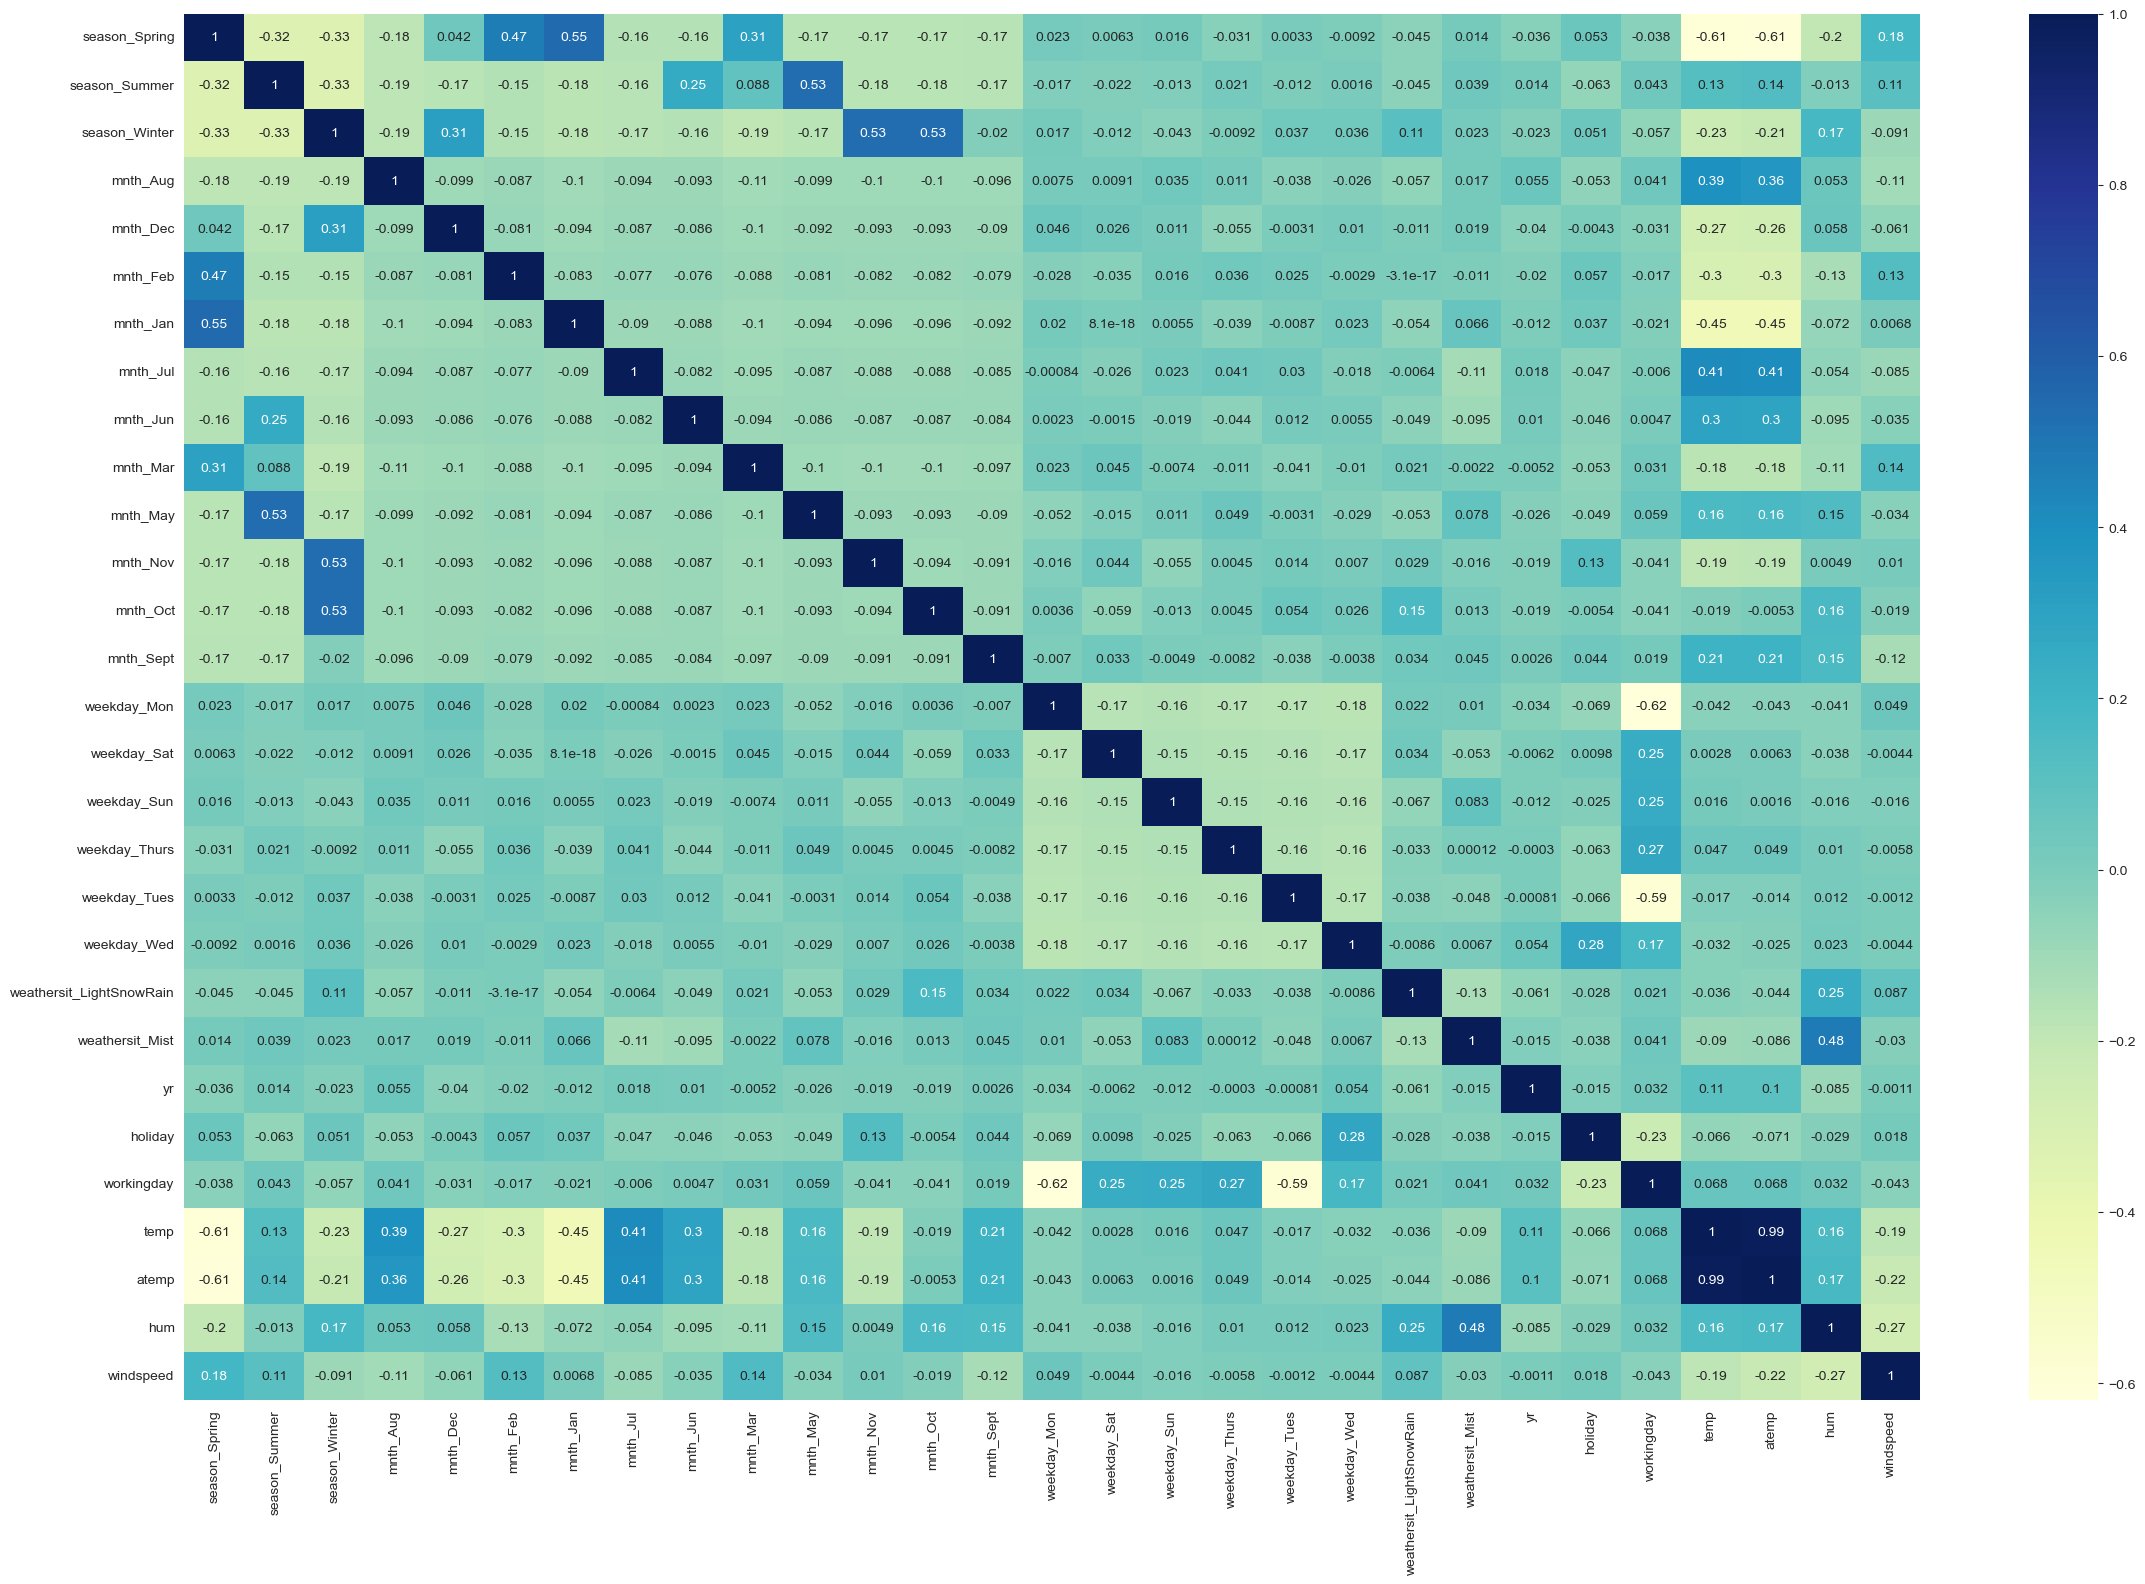

In [6024]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (28, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### <span style='color:red'>INFERENCES:</span>
Seasonal Effects:
1. Seasonality and Weather conditions play significant roles in influencing the bike rental count.
2. There are distinct seasonal patterns with specific months and weather conditions.

Month and Season Correlation:
1. Months like mnth_Dec, mnth_Jan, and mnth_Feb show positive correlations with season_Winter, which makes sense as these are winter months.
2. mnth_Jun, mnth_Jul, and mnth_Aug have positive correlations with season_Summer.

Weather Conditions:
1. The correlation between temp (temperature) and weathersit_Mist is slightly negative, suggesting misty conditions are less likely during higher temperatures.   
2. Temperature is a crucial factor, strongly correlating with the count, while windspeed and bad weather conditions have a negative impact.

Multicollinearity Issues:
1. Strong correlations among some variables (e.g., between temp and atemp, and between mnth_Jul and season_Summer) indicate   potential multicollinearity, which could affect the performance of regression models if these variables are used together.

Holiday and Working Day:
1. There is a moderate positive correlation between 'holiday' and 'cnt', indicating that the count might increase during holidays.

Years:
1. There is an increasing trend in the count over the 'years'.

## Step 6: Feature Selection using Hybrid approach.
- This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from 'sklearn'.) 

### 6.1 <span style='color:brown'>Automated</span> : Variable Selection using RFE.
### (Recursive Feature Elimination)

In [6029]:
#Importing RFE and LinearRegression.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [6031]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6032]:
#Running RFE with the output number of the variable equal to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)

#Select the number of features up to 15, using an automated approach.  
rfe = RFE(estimator=lm, n_features_to_select=15) #Running RFE
rfe = rfe.fit(X_train, y_train)

In [6035]:
#List of variables/features selected in the top 15 list.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', False, 7),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 15),
 ('weekday_Thurs', False, 13),
 ('weekday_Tues', False, 5),
 ('weekday_Wed', False, 9),
 ('weathersit_LightSnowRain', True, 1),
 ('weathersit_Mist', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [6037]:
#Selecting the selected variables via RFE in col list.(15 cols shortlisted)
cols = X_train.columns[rfe.support_]
cols

Index(['season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sept', 'weathersit_LightSnowRain', 'weathersit_Mist',
       'yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [6039]:
#Not selecting variables via RFE process.
X_train.columns[~rfe.support_]

Index(['season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'workingday'],
      dtype='object')

In [6041]:
X_train.shape

(510, 29)

In [6043]:
cols.shape

(15,)

## <span style='color:blue'> P-Value Model: 1 </span>

### 1. <span style='color:brown'>Manual</span> : Building Model Using 'statsmodel', for the detailed statistics of the '15' selected variables that we got using RFE.

### (P-Value Cutoff chosen: < 0.05)

#### <span style='color:green'>NOTE : </span>
1. High p-value , High VIF (Drop,No Brainer)
2. High-Low :
    - High p, Low VIF : Remove these first
    - Low p, High VIF : Remove these after the ones above
3. Low p, Low VIF (Keep)

In [6049]:
#Creating new dataframe with RFE selected variables.
X_train_rfe = X_train[cols]

In [6051]:
#Import statsmodel library
import statsmodels.api as sm

#Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

#Running the linear model,
lm1 = sm.OLS(y_train, X_train_lm).fit()

#Summary of our liner model.
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          8.86e-188
Time:                        23:40:41   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     494   BIC:                            -922.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### <span style='color:red'>INFERENCES:</span>
1. R-squared : 0.843
2. The variable 'atemp' might not be necessary in the model given its slight high p-value as 0.513 and statistically insignificant and can be dropped in the next model.
3. For other predictor, a p-value less than 0.05, suggests that the predictor is statistically significant in the model.

### 2. <span style='color:brown'>Manual</span> : Calculate VIF of variables.(Re-assurance)

- Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.
- The formula for calculating VIF is: VIFi = 1/1-Ri^2​

In [6056]:
#Include the dataframe excluding the 'const'.
X_train_rfe.columns

Index(['season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sept', 'weathersit_LightSnowRain', 'weathersit_Mist',
       'yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [6058]:
#To Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculate the VIF for the new model,
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [6060]:
#Calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
11,temp,352.00
12,atemp,351.98
13,hum,25.12
14,windspeed,4.17
1,season_Winter,3.00
0,season_Spring,2.94
8,weathersit_Mist,2.27
9,yr,2.07
5,mnth_Nov,1.82
3,mnth_Jan,1.75


#### <span style='color:red'>INFERENCES:</span>
1. 'temp' and 'atemp' these are extremely high VIF values, indicating a severe multicollinearity problem between these two variables. They are likely highly correlated with each other, which means they provide very similar information in the model.
2. The variables 'temp' and 'atemp' both have extremely high VIF values, indicating strong multicollinearity, also 'hum' VIF value is 25.12 which is high. 

#### <span style='color:orange'>ACTION : </span> Lets us drop variable one by one starting with 'temp' as its VIF is high compared to its p-value.

## <span style='color:blue'> P-Value Model: 2 </span>

### 1. <span style='color:brown'>Manual</span> : Rebuilding the Model without 'temp' using 'statsmodel', as observed the p-value of 'atemp' is slightly greater than 0.05

In [6066]:
X_train_new = X_train_rfe.drop(["temp"], axis = 1)

In [6068]:
X_train_new.columns

Index(['season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sept', 'weathersit_LightSnowRain', 'weathersit_Mist',
       'yr', 'holiday', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [6070]:
#Adding a constant variable
X_train_lm2 = sm.add_constant(X_train_new)

#Running the linear model,
lm2 = sm.OLS(y_train, X_train_lm2).fit()

#Summary of our liner model.
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.58e-187
Time:                        23:43:38   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### <span style='color:red'>INFERENCES:</span>
1. There is a slight reduction in R-squared and Adjusted R-squared, as seen here in the output.
2. All the p-values look statistically significant and are below 0.05 after dropping 'temp'.

### 2. <span style='color:brown'>Manual</span> : Calculate VIF of variables.(Re-assurance)

In [6074]:
X_train_new.columns

Index(['season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sept', 'weathersit_LightSnowRain', 'weathersit_Mist',
       'yr', 'holiday', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [6076]:
#To Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recalculate VIF after dropping the 'temp' column,
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [6078]:
#Calculate VIF
calculateVIF(X_train_new)

,Features,VIF
12,hum,25.08
11,atemp,16.83
13,windspeed,4.00
1,season_Winter,2.93
0,season_Spring,2.89
8,weathersit_Mist,2.26
9,yr,2.06
5,mnth_Nov,1.82
3,mnth_Jan,1.75
2,mnth_Dec,1.54


#### <span style='color:red'>INFERENCES:</span>
1. The VIF value is high, indicating that 'hum' (humidity) has significant multicollinearity with other predictors. 
2. Similarly, 'atemp' has a high VIF, suggesting it is also highly collinear with other predictors in the model.
3. It can inflate the standard errors of the coefficients, leading to less reliable statistical inferences.
- Addressing the high multicollinearity could improve the stability and interpretability of the regression model.

#### <span style='color:orange'>ACTION : </span> Lets us drop 'hum' as its VIF is high compared to its p-value.

## <span style='color:blue'> P-Value Model: 3 </span>

### 1. <span style='color:brown'>Manual</span> : Rebuilding the Model using statsmodel'.

In [6084]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [6086]:
#Adding a constant variable
X_train_lm3 = sm.add_constant(X_train_new)

#Running the linear model,
lm3 = sm.OLS(y_train, X_train_lm3).fit()

#Summary of our liner model.
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.95e-185
Time:                        23:44:32   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### <span style='color:red'>INFERENCES:</span>
1. All the p-values look statistically significant.

### 2. <span style='color:brown'>Manual</span> : Calculate VIF of variables.(Re-assurance)

In [6090]:
X_train_new.columns

Index(['season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sept', 'weathersit_LightSnowRain', 'weathersit_Mist',
       'yr', 'holiday', 'atemp', 'windspeed'],
      dtype='object')

In [6092]:
#To Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Recalculate VIF after dropping the 'hum' column,
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [6094]:
#Calculate VIF
calculateVIF(X_train_new)

,Features,VIF
11,atemp,4.57
12,windspeed,3.95
1,season_Winter,2.55
0,season_Spring,2.35
9,yr,2.06
5,mnth_Nov,1.80
3,mnth_Jan,1.65
8,weathersit_Mist,1.53
2,mnth_Dec,1.46
4,mnth_Jul,1.35


#### <span style='color:red'>INFERENCES:</span>
1. All the p-values look statistically significant from the experimented model.
2. The VIF values for all the variables are below the common threshold of 5, indicating that multicollinearity is not a significant issue in this model.
3. Now there is no immediate need to drop any variables based on VIF alone.

## Step 7: Residual Analysis on the train data.

- We shall now check below,
1) Whether the error terms are also normally distributed (one of the major assumptions of linear regression),
2) Let us plot the histogram of the error terms and see what it looks like.

In [6099]:
#Calculation of Error Prediction in Training Data.
y_train_pred = lm3.predict(X_train_lm3)
res = (y_train - y_train_pred)

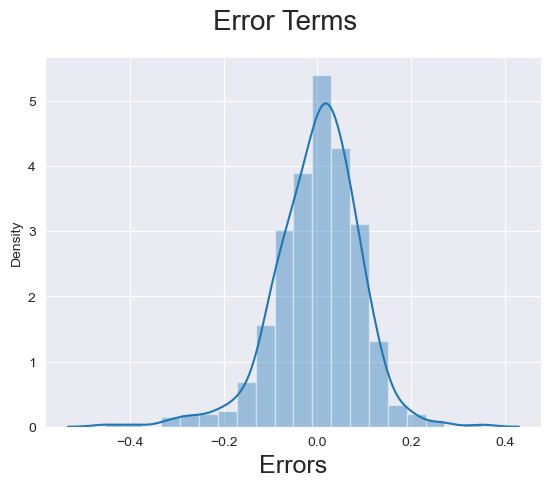

In [6101]:
#Plot the histogram of the error terms,
fig = plt.figure()
sns.distplot((res), bins = 20)

#Plot heading
fig.suptitle('Error Terms', fontsize = 20)  

#X-Label
plt.xlabel('Errors', fontsize = 18)  

plt.show()

#### <span style='color:red'>INFERENCES:</span>
1. The error terms appear to be approximately normally distributed, centered around zero. This suggests that the model's errors are unbiased, as they are symmetrically distributed around the mean.
2. The distribution is fairly symmetrical, indicating no significant skewness. This is a good sign for linear models, as it suggests that the errors do not have a systematic bias in one direction.
3. This distribution suggests that the model is well-fitted, with errors that are normally distributed and centered around zero, as we desired.

### 7.1 Looking for patterns in the residuals (Homoscedasticity)

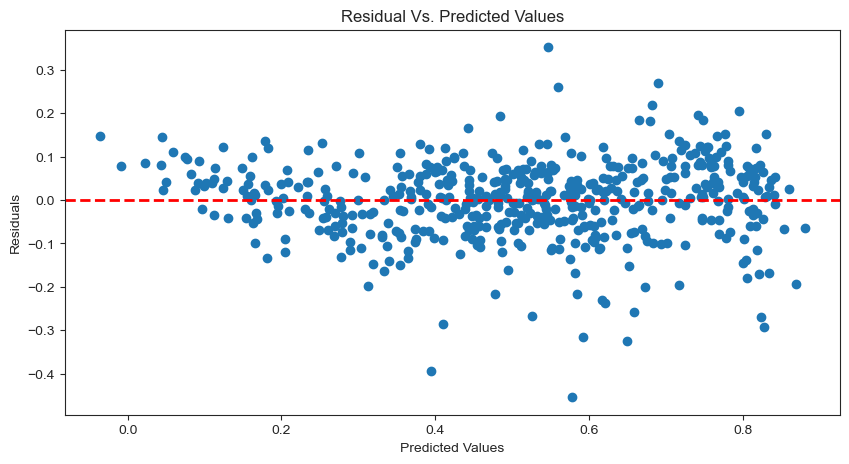

In [6105]:
plt.figure(figsize = (10,5))
sns.set_style("ticks")
plt.scatter(y_train_pred,res)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### <span style='color:red'>INFERENCES:</span>
1. The residuals are scattered randomly around the horizontal red line at y=0.
2. This randomness suggests that the model's predictions do not have a systematic error and that the residuals are evenly distributed around zero.
3. The plot suggests that the model is performing well, with no obvious signs of bias, patterns, or non-constant variance in the residuals. This indicates that the linear model is likely a good fit for the data.

### 7.2 Looking for Constant Variance (Heteroscedasticity)

- After confirming that there is no systematic pattern in the residuals and that the residuals appear to be homoscedastic, the next step often involves looking more closely at the variance of these residuals to ensure it meets the assumptions of the regression model. 

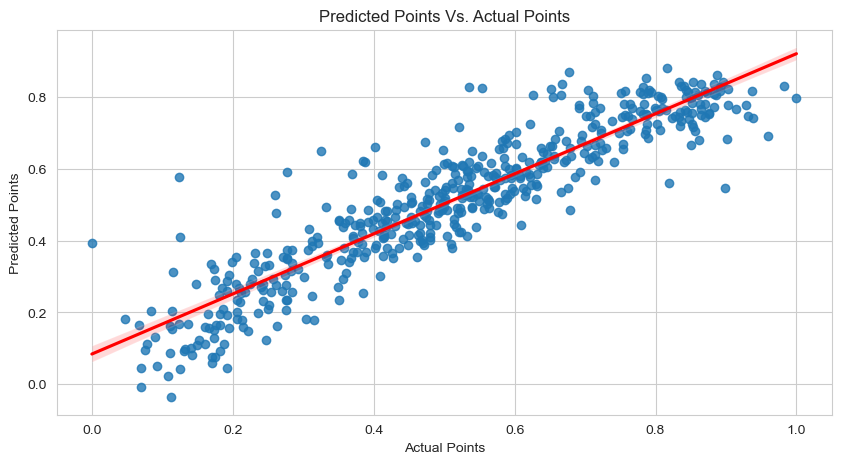

In [6110]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")  # Use "whitegrid" instead of "darkgrid"
sns.regplot(x=y_train, y=y_train_pred, line_kws={"color": "red"})  # You can also change the regression line color
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

#### <span style='color:red'>INFERENCES:</span>
1. The scatter plot shows a strong positive linear relationship between the actual points (on the x-axis) and the predicted points (on the y-axis). 

## Step 8: Evaluation : Making Predictions.

- We have fitted the model and checked the normality of error terms, lets proceed to make predictions using the final model that we got.

### 8.1 Applying the scaling on the test sets.

In [6116]:
#Applying 'transform' to 'df_test'
num_vars = ['cnt','hum','windspeed','temp','atemp']
df_test[num_vars] = scaler.transform(df_test[num_vars])

### 8.2 Dividing into X_test and y_test

In [6119]:
y_test = df_test.pop('cnt')
X_test = df_test

In [6145]:
#Now lets use our model to make predictions,
#Creating X_test_new dataframe by dropping variables from X_test,
X_test_new = X_test[X_train_new.columns]

#Adding a constant variable to the test datafram
X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()

,const,season_Spring,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sept,weathersit_LightSnowRain,weathersit_Mist,yr,holiday,atemp,windspeed
184,1.0,0,0,0,0,1,0,0,0,1,0,1,0.769660,0.084219
535,1.0,0,0,0,0,0,0,0,0,0,1,0,0.842587,0.153728
299,1.0,0,1,0,0,0,0,0,0,1,0,0,0.496145,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0,0,0.795343,0.339570
152,1.0,0,0,0,0,0,0,0,0,0,0,0,0.741471,0.537414


In [6147]:
# (Assuming your model was trained without a constant)
y_pred = lm3.predict(X_test_sm)

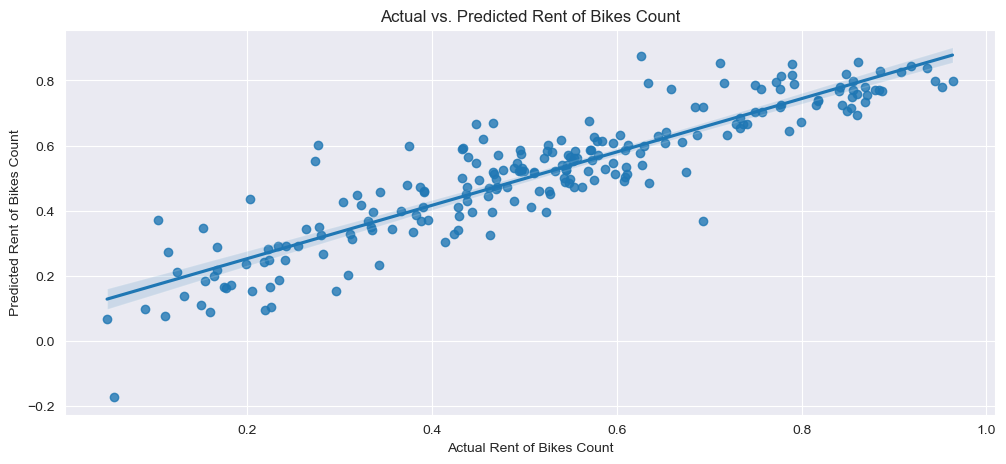

In [6149]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,5))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

#### <span style='color:red'>INFERENCES:</span>
1. The plot suggests a reasonably well-performing model with a positive linear correlation between actual and predicted values.
2. The final model fit is not due to random chance and has decent predictive power.

## Step 9: Calculating the R2_Score.

### 9.1 To evaluate model performance with the help of R2_score.

In [6154]:
#To calculate the R2_score.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.817966942473972

In [6156]:
r2_score = r2_score(y_test, y_pred)
round(r2_score,4)

0.818

## <span style='color:green'>Final equation of the best fitted line. </span>

In [6159]:
#lm_2 is a fitted model object of train set,
param = pd.DataFrame(lm_2.params)

#Add a 'Variables' column with the index values of the params
param.insert(0, 'Variables', param.index)

#Rename the column with coefficients
param.rename(columns={0: 'Coefficient value'}, inplace=True)

#Create an index that matches the length of the DataFrame
param['index'] = list(range(len(param)))  # Ensuring index length matches param length

#Set 'index' as the index of the DataFrame
param.set_index('index', inplace=True)

#Sort the DataFrame by 'Coefficient value' in descending order
param.sort_values(by='Coefficient value', ascending=False, inplace=True)

#Display the DataFrame
print(param)

                      Variables  Coefficient value
index                                             
0                         const           0.364997
12                         temp           0.352911
10                           yr           0.231253
13                        atemp           0.088682
2                 season_Winter           0.073031
7                     mnth_Sept           0.056997
3                      mnth_Dec          -0.045259
6                      mnth_Nov          -0.049154
4                      mnth_Jan          -0.050000
9               weathersit_Mist          -0.057156
5                      mnth_Jul          -0.072029
11                      holiday          -0.089876
1                 season_Spring          -0.100797
14                          hum          -0.150414
15                    windspeed          -0.177862
8      weathersit_LightSnowRain          -0.252275


### <span style='color:green'> Y represents the predicted outcome. </span>
Y=0.364997+0.352911×temp+0.231253×yr+0.088682×atemp+0.073031×season_Winter+0.056997×mnth_Sept−0.045259×mnth_Dec−0.049154×mnth_Nov−0.050000×mnth_Jan−0.057156×weathersit_Mist−0.072029×mnth_Jul−0.089876×holiday−0.100797×season_Spring−0.150414×hum−0.177862×windspeed−0.252275×weathersit_LightSnowRain


### <span style='color:green'> Comparision between Training and Test dataset: </span>
- Train dataset R^2          : 0.836
- Test dataset R^2           : 0.818

## <span style='color:green'>RECOMMENDATIONS FOR THE COMPANY:</span>

1. Which variables are significant in predicting the demand for shared bikes?
 - The significant variables like <span style='color:red'> temperature, year, windspeed, humidity, weather conditions, and seasons </span> provide a strong basis for predicting and understanding the demand for shared bikes.
 - 'weathersit_LightSnowRain' (-0.252275): This variable is significant, indicating that adverse weather conditions like light snow or rain significantly reduce bike demand.
 - hum (-0.150414): Humidity also has a potential impact on bike demand. Higher humidity levels decrease the likelihood of people using bikes.
 - windspeed (-0.177862): Wind speed negatively impacts bike demand, making it a significant predictor. Higher wind speeds lead to a decrease in bike usage.
 - season_Spring (-0.100797): The season of spring has a negative impact, making it a significant predictor in reducing bike demand compared to other seasons.

2. How well those variables describe the bike demands?
- These R² values of model indicates,
  1. The model explains approximately <span style='color:red'> '83.6%' </span> of the variance in bike demand in the training dataset.
  2. <span style='color:red'> 81.8%  </span> in the test dataset suggesting the significant variables identified contribute well to describing bike demand, capturing most of the variability in the data.
   

--THANKYOU--